In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:/Users/hp/Downloads/Diwali Sales Data.csv',encoding='latin1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [6]:
df.shape

(11251, 13)

In [7]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df['Amount']=df['Amount'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [11]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [12]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [13]:
df.to_csv('cleaned_data2.csv',index=False)

# EDA

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#### gender

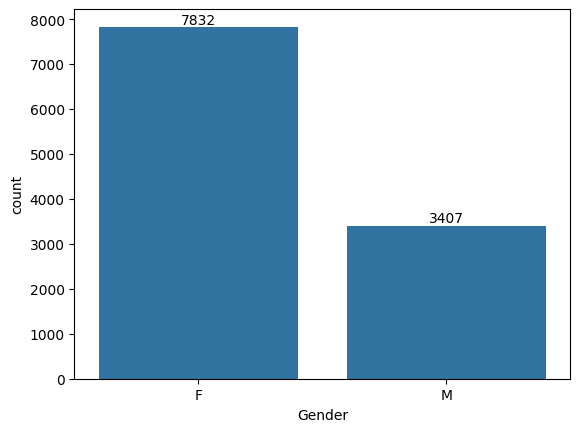

In [15]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
sales_by_gender=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [17]:
sales_by_gender


,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

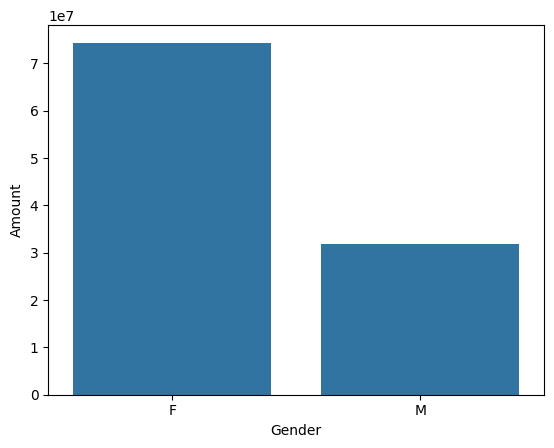

In [18]:
sns.barplot(data=sales_by_gender,x='Gender',y='Amount')

### age group

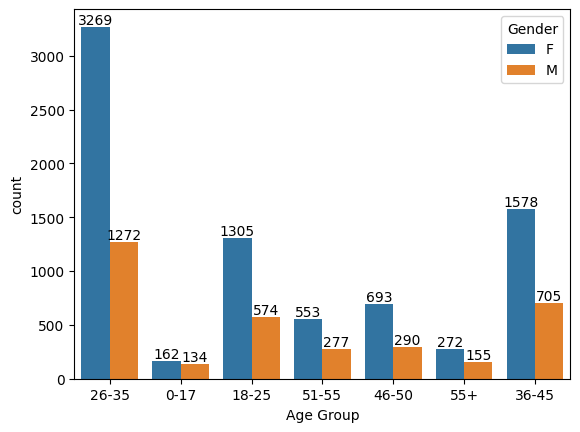

In [19]:
ag=sns.countplot(data=df,x='Age Group',hue="Gender")
for bars in ag.containers:
    ag.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

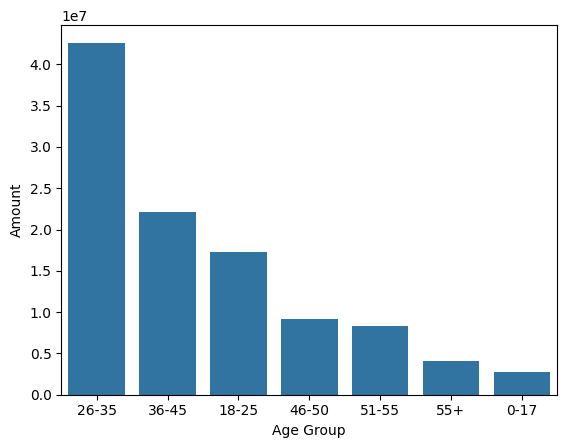

In [20]:
sales_by_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sales_by_age,x='Age Group',y='Amount')

### 'Marital_Status'

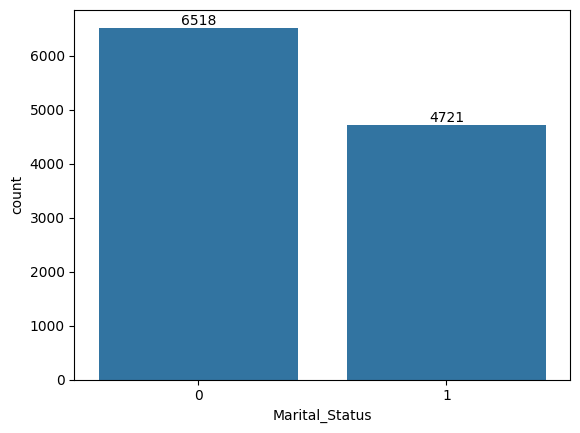

In [21]:
ms=sns.countplot(data=df,x='Marital_Status')
for bars in ms.containers:
    ms.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

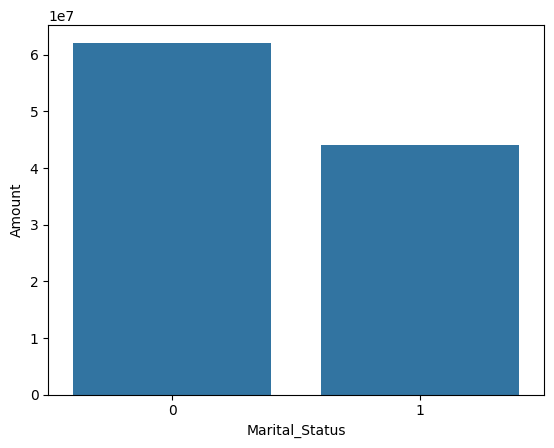

In [22]:
#sales_by_marital_status
sbms=df.groupby(['Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sbms,x='Marital_Status',y='Amount')

# state

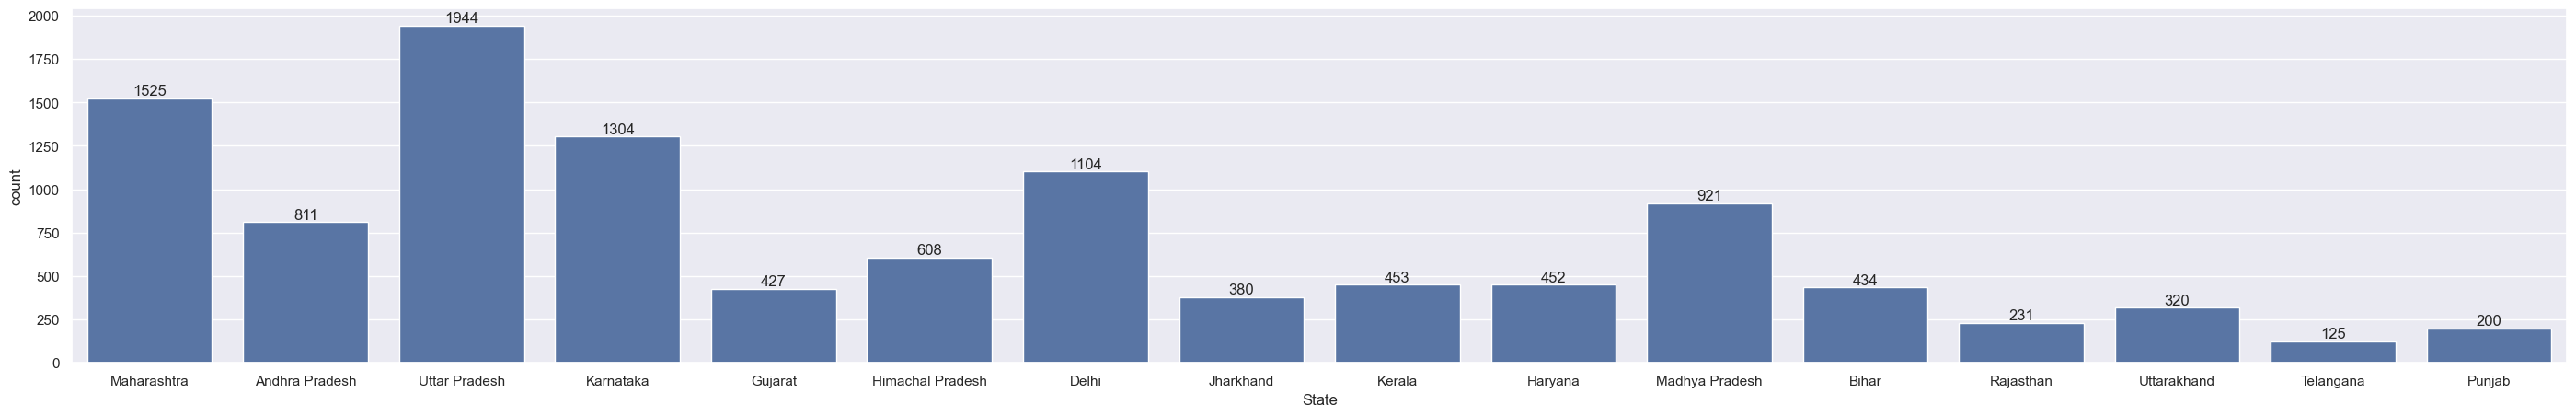

In [33]:
s=sns.countplot(data=df,x='State')
for bars in s.containers:
    s.bar_label(bars)
    sns.set(rc={'figure.figsize':(35,5)})

<Axes: xlabel='State', ylabel='Orders'>

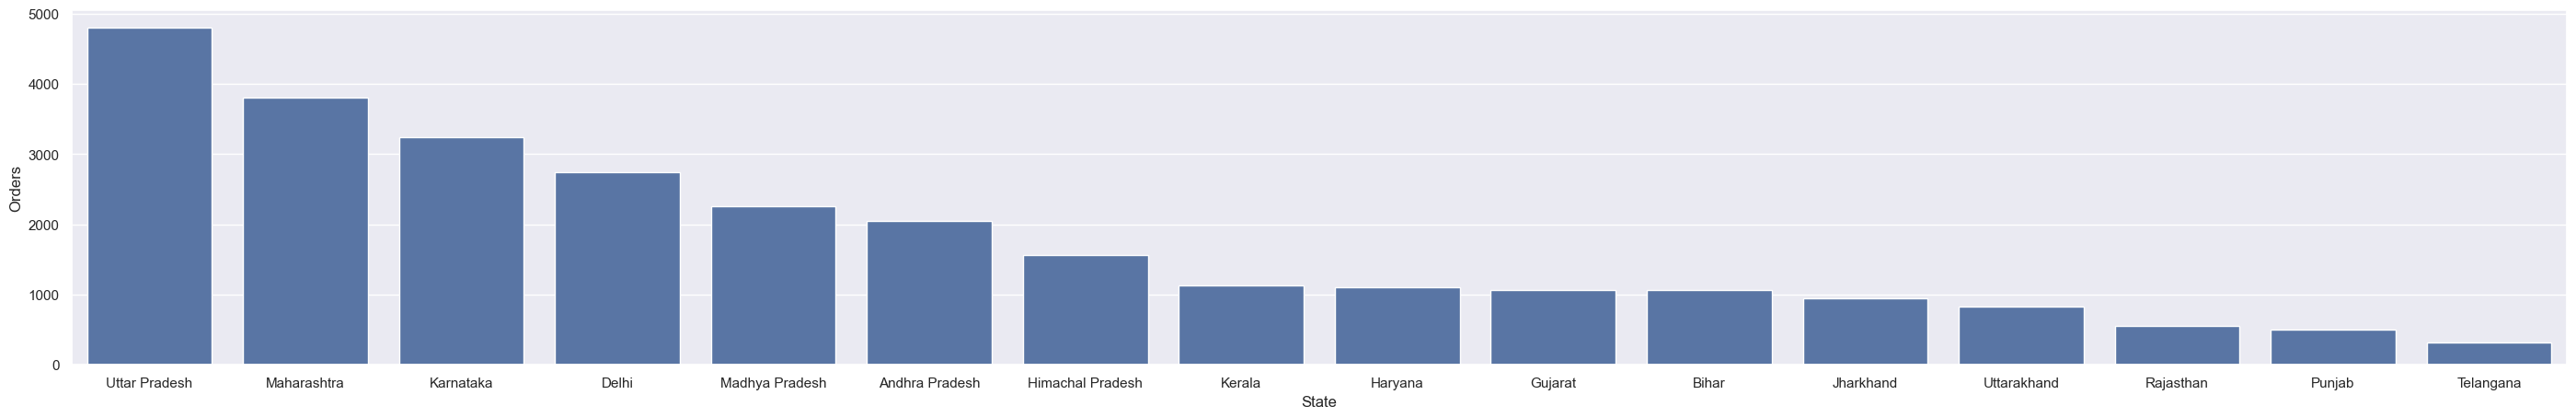

In [24]:
# state by order
sbo=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(ascending=False,by='Orders')
sns.barplot(data=sbo,y='Orders',x='State')

### occupation

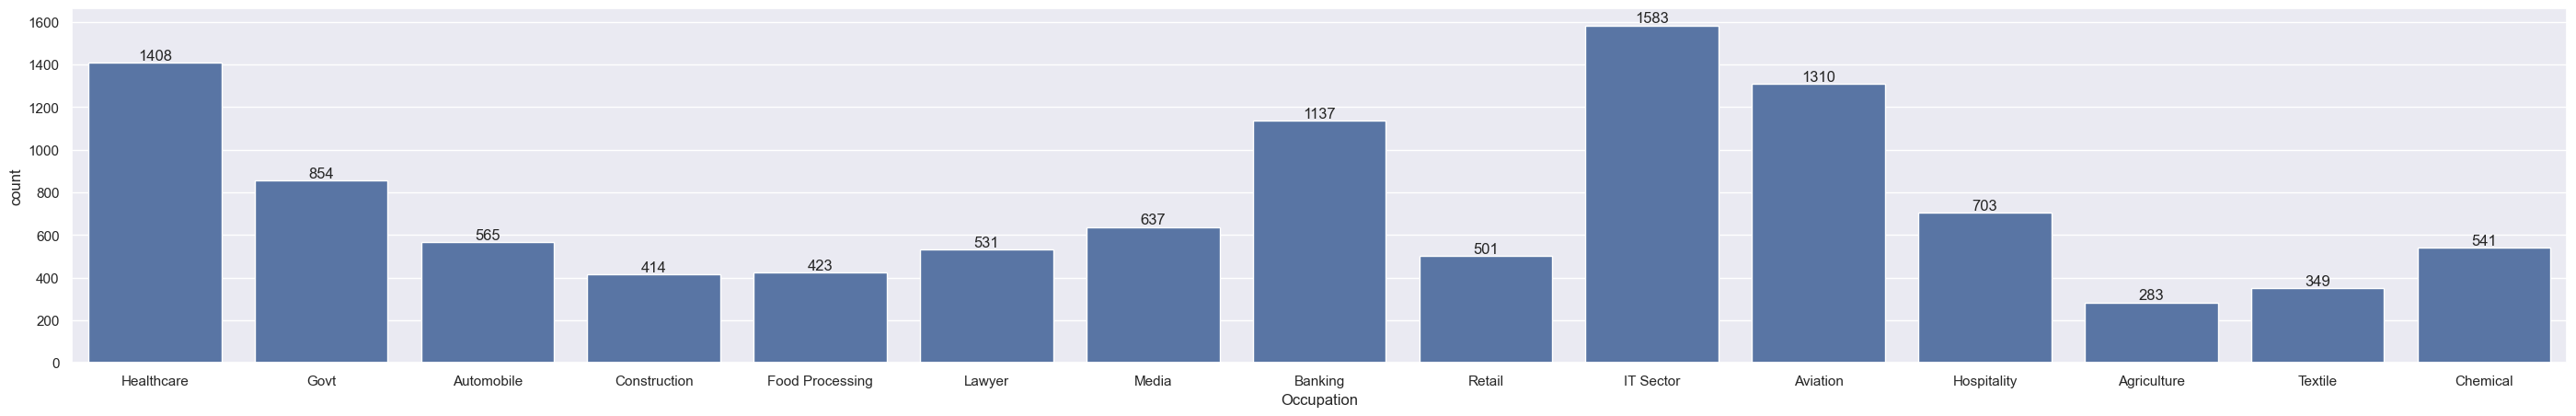

In [25]:
x=sns.countplot(data=df,x='Occupation')
for bars in x.containers:
    x.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

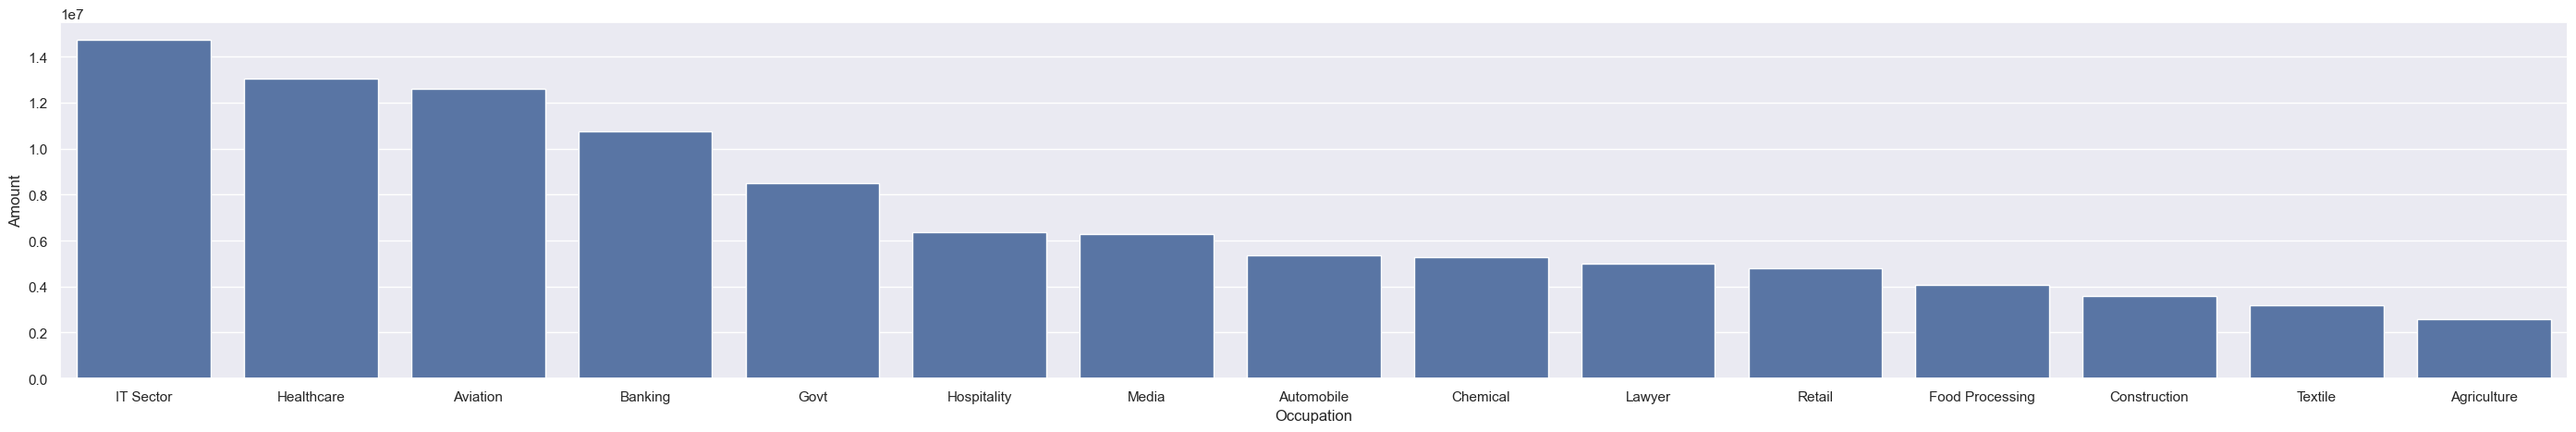

In [26]:
sales_by_occupation=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sales_by_occupation,x='Occupation',y='Amount')

### product category

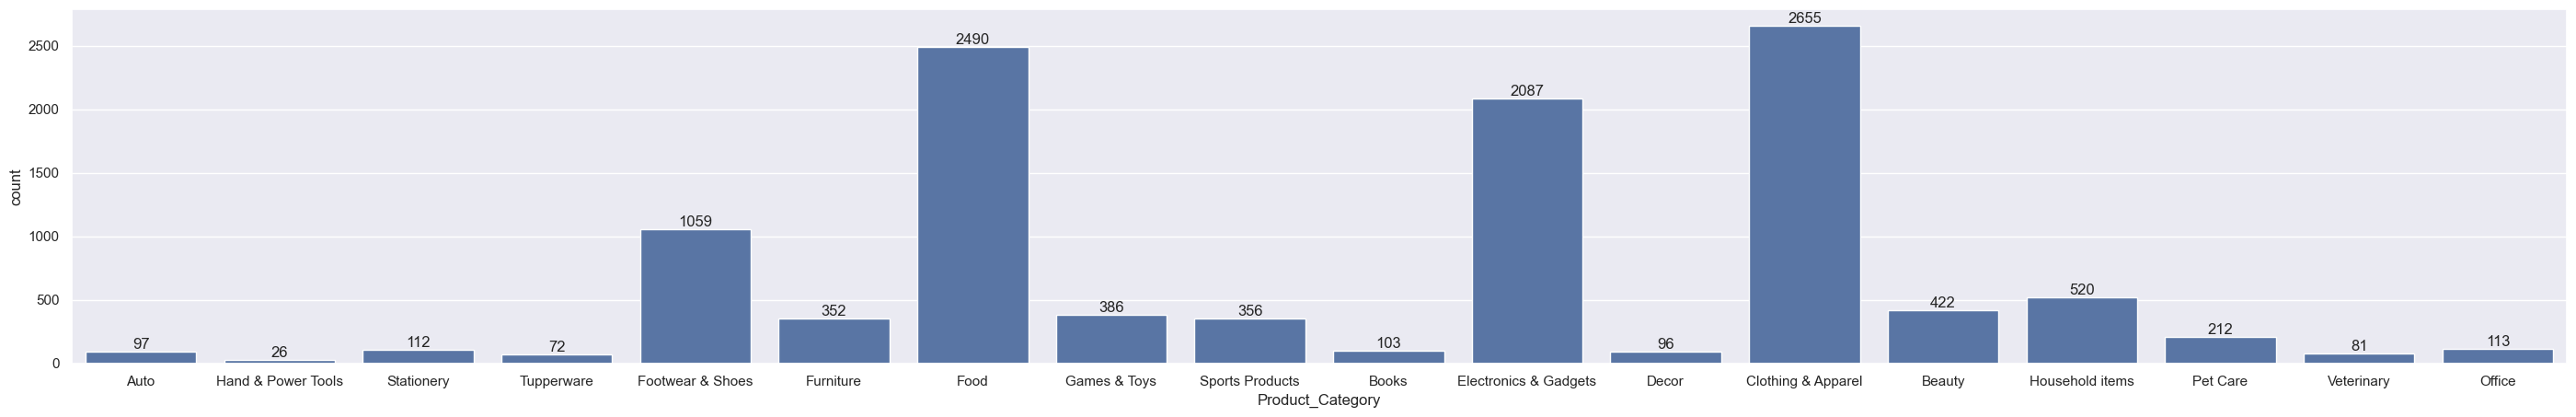

In [27]:
p=sns.countplot(data=df,x='Product_Category')
for bars in p.containers:
    p.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

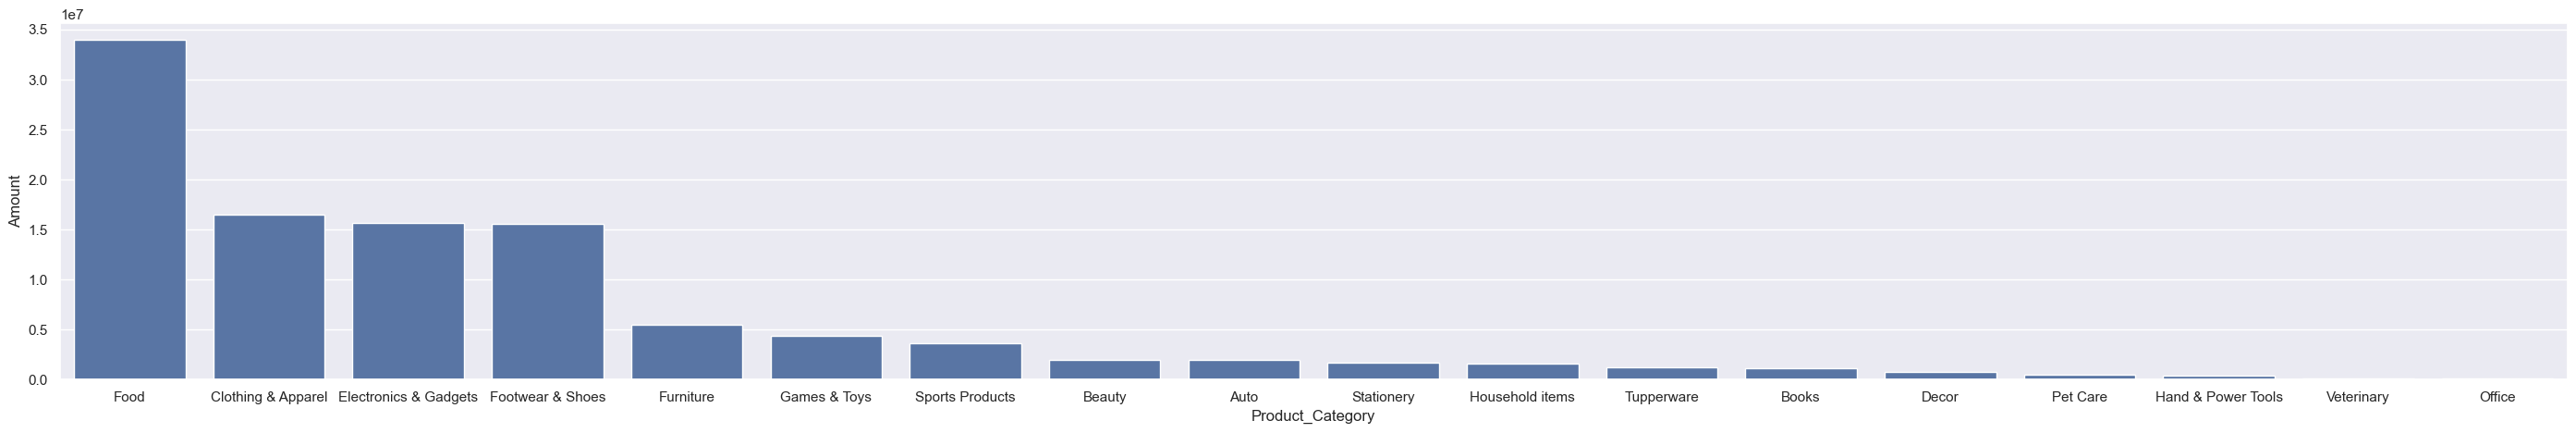

In [28]:
#sales_by_productcategory
z=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Product_Category',y='Amount',data=z)

# product id

<Axes: xlabel='Product_ID', ylabel='Orders'>

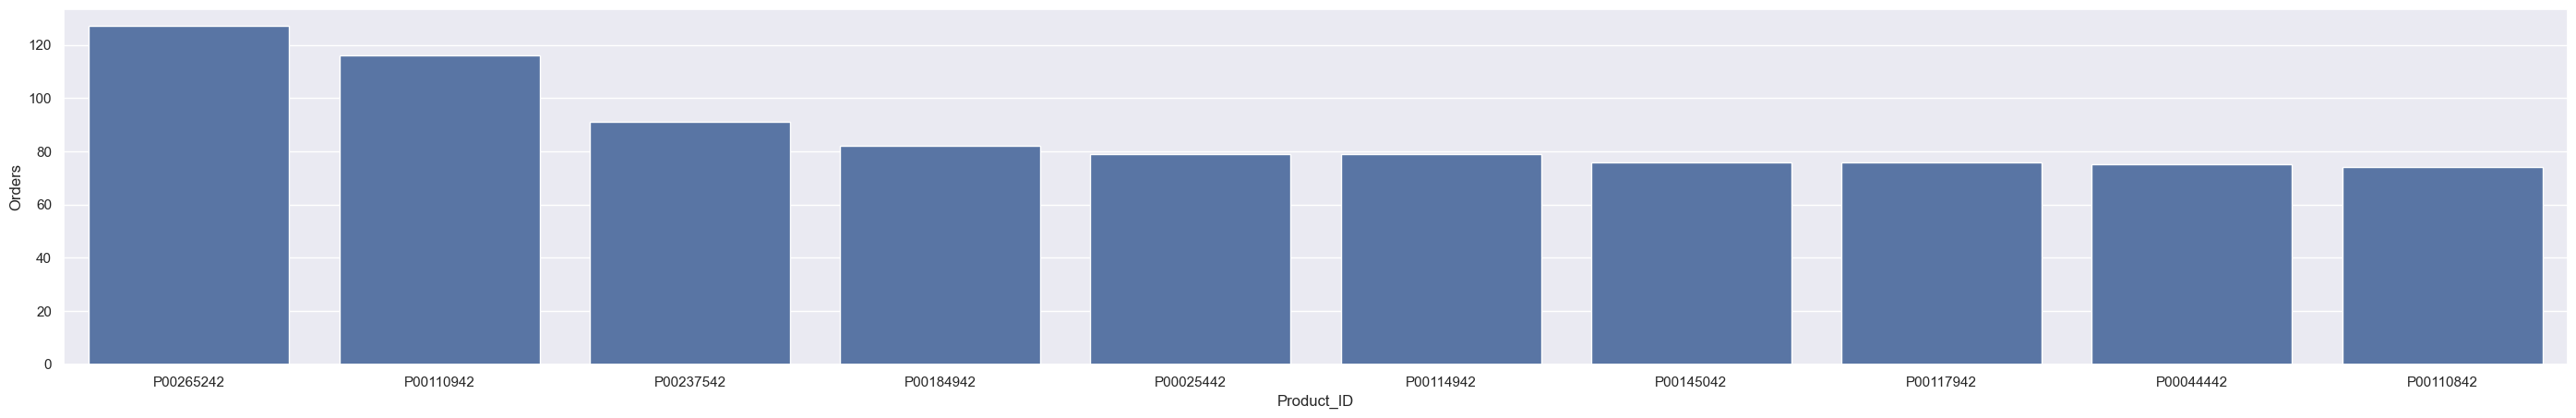

In [29]:
#sales_by_product-id
sbpid=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(data=sbpid,x='Product_ID',y='Orders')

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Customer Analysis

      Cust_name  Amount
1196   Vishakha  382782
1102     Sudevi  287142
1185    Vasudev  281034
800       Neola  275234
28    Alejandro  272517
2        Aastha  266961
1049   Shreyshi  265603
491       Hazel  242343
24       Akshat  241349
446       Gopal  239147


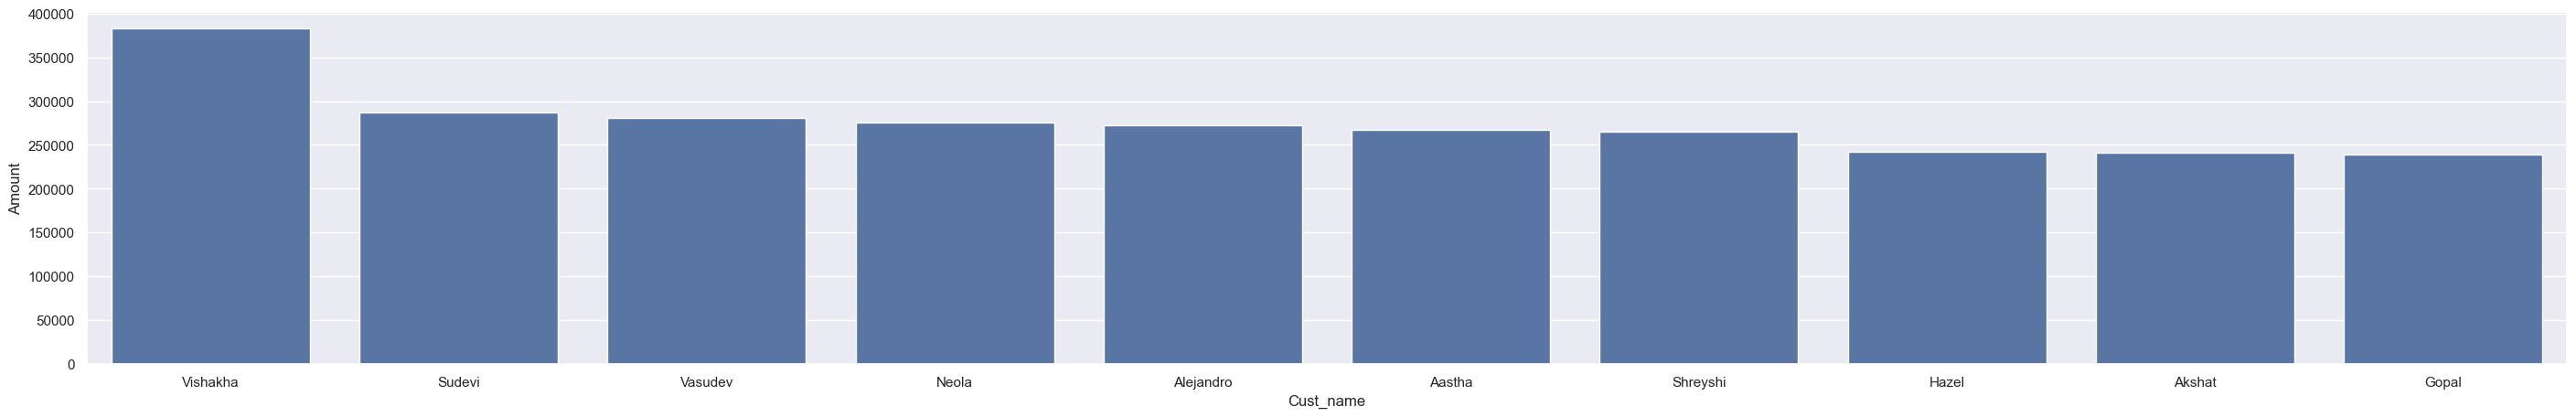

In [31]:
ca=df.groupby(['Cust_name'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='Cust_name',y='Amount',data=ca)
print(ca)

      Cust_name  Orders
1196   Vishakha     106
1049   Shreyshi      75
28    Alejandro      73
1102     Sudevi      71
24       Akshat      69
22        Akash      64
1099      Stuti      63
2        Aastha      62
987      Sanjay      61
410    Fritzler      60


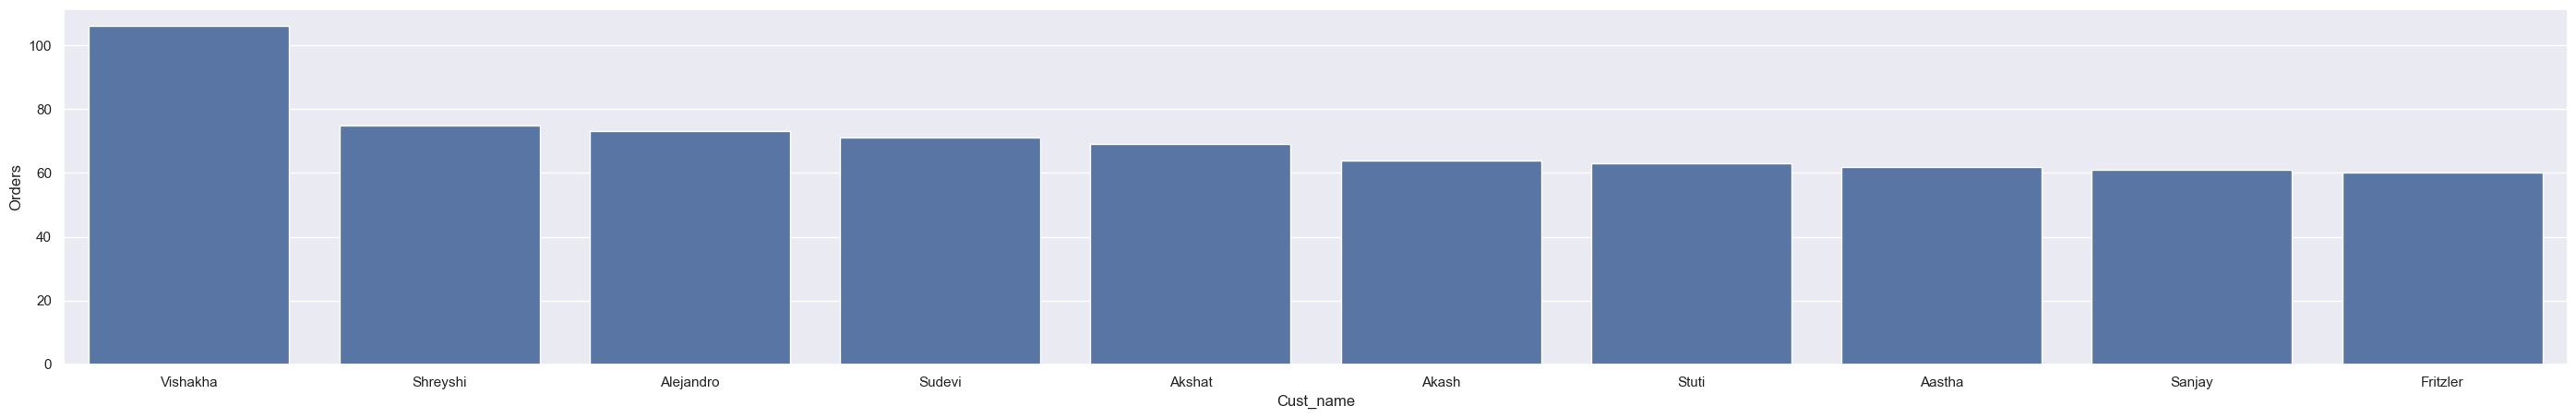

In [32]:
co=df.groupby(['Cust_name'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(x='Cust_name',y='Orders',data=co)
print(co)